# 한글

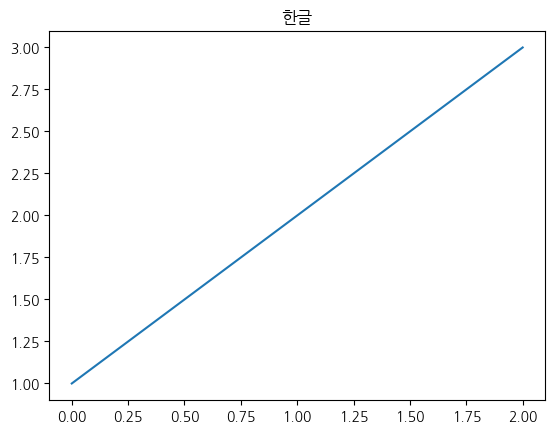

In [27]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 데이터불러오기

In [28]:
# CSV 파일 불러오기
data = pd.read_csv('data/액체_모델용.csv') 

In [29]:
df_sorted = data.sort_values(by='대기율', ascending=True)
df_sorted.head(3)

,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),액체화물
0,2020-01-01 01:00:00,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,2020-01-01 08:15:00,MBU,1,SK2부두 01,석유제품 운반선,430.0,0.0,700.0,0.000,70.9,12.0,3.9,5.35,66.01,5,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0,1
24132,2020-11-30 14:00:00,2020,11,30,14,130074,2020-11-30 14:30:00,2020-11-30 16:35,0,0.0,2020-11-30 14:30:00,2020-11-30 16:35:00,MBA,1,양곡부두,석유제품 운반선,125.0,0.0,291.0,626.173,50.0,7.6,3.9,3.95,49.95,30,6.1,307.0,9.0,1030.8,50.0,8.4,20.2,1.7,1.2,0.8,6.4,58.0,1
24131,2020-11-30 14:00:00,2020,11,30,14,150074,2020-11-30 14:00:00,2020-11-30 17:00,0,0.0,2020-11-30 14:00:00,2020-11-30 17:00:00,MBO,2,온산2부두,석유제품 운반선,180.0,0.0,1130.0,2286.000,66.1,11.5,5.0,5.95,74.00,0,6.1,307.0,9.0,1030.8,50.0,8.4,20.2,1.7,1.2,0.8,6.4,58.0,1


In [30]:
# ddaattaa = df_sorted.iloc[4:, :]

In [31]:
# ddaattaa.to_csv('액체_모델용.csv', encoding='utf-8-sig', index=False)

In [32]:
data.columns

Index(['Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호',
       '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '액체화물'],
      dtype='object')

In [34]:
# 두 칼럼을 합쳐 새로운 칼럼 생성
data['계선장소'] = data['계선장소_코드'].astype(str) + data['계선장소_숫자'].astype(str)

# '계선장소_코드'와 '계선장소_숫자컬럼' 칼럼 삭제
data = data.drop(['계선장소_코드', '계선장소_숫자'], axis=1)


KeyError: '계선장소_코드'

# 최종 비교용 모델

## 수정(참고내용)

In [35]:
import pandas as pd
# CSV 파일 불러오기
Final_D = pd.read_csv('data/for_ship_model.csv') 

In [37]:
df_sorted = Final_D.sort_values(by='대기율', ascending=True)
df_sorted.head(3)

,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,접안_대기시간_분,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),이전_입항선박수,연도별_선석점유율,시설연평균_재화중량톤수,연평균_총입항건수,선박_연평균_서비스시간,선박_연평균_대기시간,호출부호_encoded,계선장소명_encoded,선박용도_encoded
0,2020,1,1,1,88238,0,SK2부두 01,석유제품 운반선,430.0,0.0,700.0,0.000,70.9,12.0,3.9,5.35,66.01,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0,0,4.143219,2073.888986,1729.000000,1452.987426,572.048817,0,0,0
24132,2020,11,30,14,130074,0,양곡부두,석유제품 운반선,125.0,0.0,291.0,626.173,50.0,7.6,3.9,3.95,49.95,6.1,307.0,9.0,1030.8,50.0,8.4,20.2,1.7,1.2,0.8,6.4,58.0,1,0.949959,7355.111898,27.333333,598.508370,342.678956,913,85,0
24131,2020,11,30,14,150074,0,온산2부두,석유제품 운반선,180.0,0.0,1130.0,2286.000,66.1,11.5,5.0,5.95,74.00,6.1,307.0,9.0,1030.8,50.0,8.4,20.2,1.7,1.2,0.8,6.4,58.0,0,1.324234,5441.448529,255.333333,2194.825880,0.000000,165,29,0


In [38]:
Final_D.columns

Index(['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)', '풍속(m/s)',
       '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)',
       '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded'],
      dtype='object')

In [39]:
Final_D.columns = ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '선박_길이1', '풍속',
       '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온',
       '최대파고', '유의파고', '평균파고', '파주기', '파향', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded']

x_cols = ['ETA_Hour', 'Service_Time_분', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '풍속',
       '풍향', '현지기압', '습도', '기온', '수온',
       '최대파고', '유의파고', '평균파고', '파주기', '파향', '이전_입항선박수', '시설연평균_재화중량톤수', 
        '연평균_총입항건수', '선박_연평균_서비스시간', '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded']

## 모델링

0:	learn: 1111.8018575	test: 1081.5122167	best: 1081.5122167 (0)	total: 201ms	remaining: 1m 40s
100:	learn: 753.8851130	test: 1013.3507953	best: 1005.4794191 (57)	total: 4.45s	remaining: 17.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1005.479419
bestIteration = 57

Shrink model to first 58 iterations.
0:	learn: 1105.4143835	test: 1140.8236058	best: 1140.8236058 (0)	total: 43.1ms	remaining: 21.5s
100:	learn: 743.5860853	test: 1091.2151085	best: 1086.3897394 (56)	total: 4.38s	remaining: 17.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1086.389739
bestIteration = 56

Shrink model to first 57 iterations.
0:	learn: 1095.9672192	test: 1226.5192049	best: 1226.5192049 (0)	total: 41.3ms	remaining: 20.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1167.690631
bestIteration = 45

Shrink model to first 46 iterations.
0:	learn: 1106.9653896	test: 1138.3472348	best: 1138.3472348 (0)	total: 43.1ms	remaining: 21.5s
100:	learn: 765.8

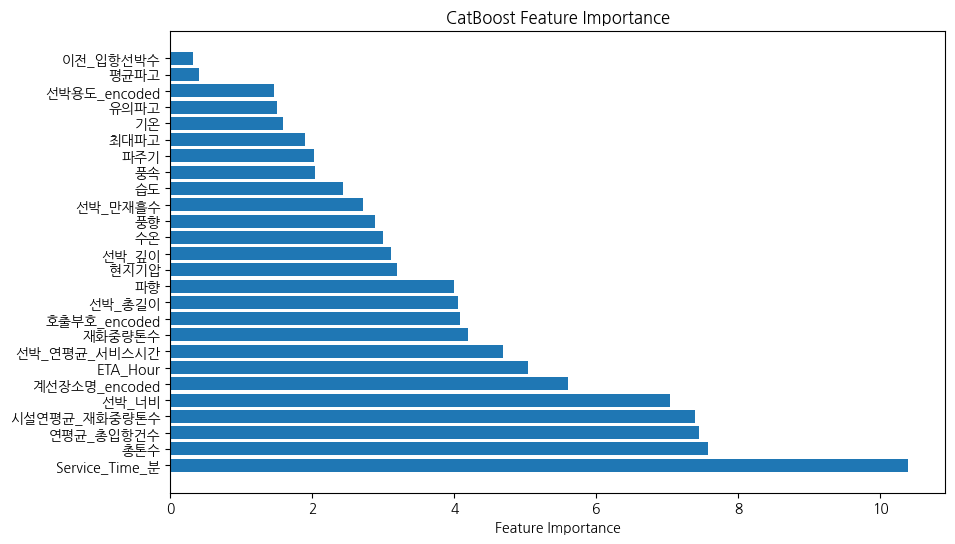

In [40]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 특성과 타겟 분리
X = Final_D[x_cols]
y = Final_D['접안_대기시간_분']

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=12)

# 성능 지표 초기화
rmse_scores = []
r2_scores = []

# KFold를 이용한 교차 검증
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost 모델 생성 및 훈련
    model = CatBoostRegressor(iterations=500,
                              learning_rate=0.3,
                              depth=10, 
                              loss_function='RMSE',
                              verbose=100)
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 계산
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    # 성능 지표 저장
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# 교차 검증 결과 출력
print(f'Average RMSE: {sum(rmse_scores) / len(rmse_scores)}')
print(f'Average R2 Score: {sum(r2_scores) / len(r2_scores)}')

# 피처 임포턴스 시각화
feature_importance = model.get_feature_importance()
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()


0:	learn: 1111.8018575	test: 1081.5122167	best: 1081.5122167 (0)	total: 58.6ms	remaining: 29.2s
100:	learn: 753.8851130	test: 1013.3507953	best: 1005.4794191 (57)	total: 4.64s	remaining: 18.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1005.479419
bestIteration = 57

Shrink model to first 58 iterations.
0:	learn: 1105.4143835	test: 1140.8236058	best: 1140.8236058 (0)	total: 43.9ms	remaining: 21.9s
100:	learn: 743.5860853	test: 1091.2151085	best: 1086.3897394 (56)	total: 4.23s	remaining: 16.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1086.389739
bestIteration = 56

Shrink model to first 57 iterations.
0:	learn: 1095.9672192	test: 1226.5192049	best: 1226.5192049 (0)	total: 43.6ms	remaining: 21.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1167.690631
bestIteration = 45

Shrink model to first 46 iterations.
0:	learn: 1106.9653896	test: 1138.3472348	best: 1138.3472348 (0)	total: 46.4ms	remaining: 23.1s
100:	learn: 765.8

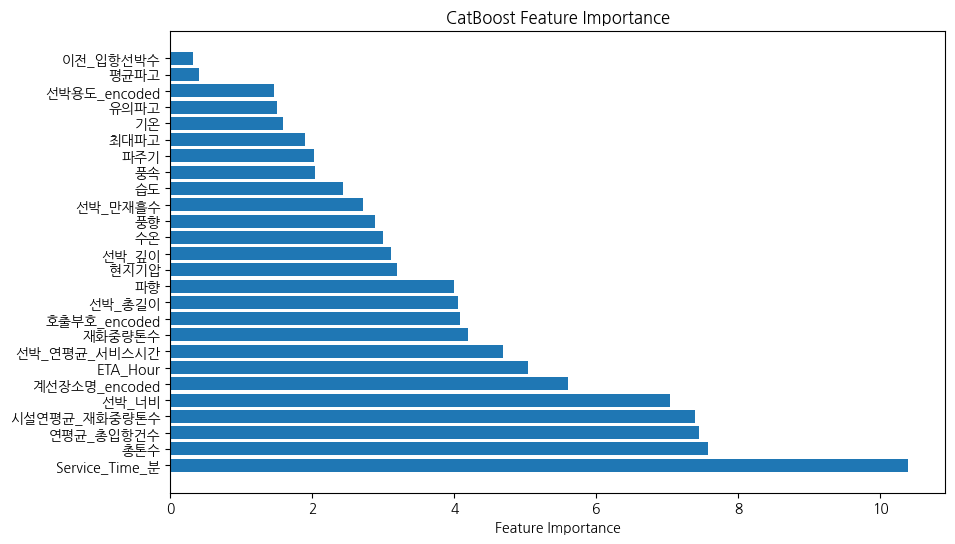

In [41]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 특성과 타겟 분리
X = Final_D[x_cols]
y = Final_D['접안_대기시간_분']

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=12)

# 성능 지표 초기화
rmse_scores = []
r2_scores = []

# KFold를 이용한 교차 검증
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost 모델 생성 및 훈련
    model = CatBoostRegressor(iterations=500,
                              learning_rate=0.3,
                              depth=10, 
                              loss_function='RMSE',
                              verbose=100)
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 계산
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    # 성능 지표 저장
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# 교차 검증 결과 출력
print(f'Average RMSE: {sum(rmse_scores) / len(rmse_scores)}')
print(f'Average R2 Score: {sum(r2_scores) / len(r2_scores)}')

# 데이터의 수와 독립 변수의 수 계산
n = X.shape[0]
k = X.shape[1]

# 결정계수 계산 및 출력
r2 = np.mean(r2_scores)
print(f"Mean R^2: {r2}")

# 조정 결정계수 계산
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f"Adjusted R^2: {adj_r2}")

# 피처 임포턴스 시각화
feature_importance = model.get_feature_importance()
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()
